This code is for testing the functions that will be used on the SuperComputer, Unity at OSU Arts&Sciences. 
The main difference between this code and any regular python (not notebook) is from reading in the galprop simulations. They are tarzipped differently on my machine and SC. 

In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.unicode']=False
import os
os.getcwd()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


'C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\analysis_GCR_models\\SC_python_code'

In [2]:
# READ IN SOME MODELS. PICK 3 FOR TESTING
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
from get_splines import *
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#'C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'

tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
# Get some specific models
models_to_find=["GALPROP/runs_L_D/L_3_D_6/nuclei_full_56_L_3_D_6", "GALPROP/runs_L_D/L_3_D_3/nuclei_full_56_L_3_D_3","GALPROP/runs_L_D/L_7_D_6/nuclei_full_56_L_7_D_6"]
#tar = tarfile.open("runs_L_D.tar.gz")
k=0
names=[]
FITS_data_full=[]
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#while k<:
while k<len(list_found): 
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    if (tar.getmembers()[j].name==models_to_find[0]) or (tar.getmembers()[j].name==models_to_find[1]) or (tar.getmembers()[j].name==models_to_find[2]):
        fileFITS_data = fits.getdata(open_file)
        print(tar.getmembers()[j].name)
        print(type(fileFITS_data))
        print(fileFITS_data.shape)
        for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
            fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
        fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
        #FITS_data_full.append(fileFITS_data)
        # append to the arrays we need instead:
        names.append(tar.getmembers()[j].name)
        fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()


GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [3]:
#get energy axis and change to GeV (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
print(energy)
model=0
print(f'model= {fluxes_per_element_full[model][-1]}')
be_10_be_9_model_ratio=np.true_divide(fluxes_per_element_full
                                      [model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],
                                      fluxes_per_element_full
                                      [model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be9_loc)])

[1.00000000e-01 2.01533567e-01 4.06157787e-01 8.18544275e-01
 1.64964148e+00 3.32458131e+00 6.70014730e+00 1.35030459e+01
 2.72131700e+01 5.48436722e+01 1.10528409e+02 2.22751845e+02
 4.48919739e+02 9.04723963e+02 1.82332247e+03 3.67460682e+03
 7.40556620e+03 1.49247017e+04 3.00782838e+04 6.06178382e+04
 1.22165292e+05 2.46204070e+05 4.96183844e+05 9.99977000e+05]
model= GALPROP/runs_L_D/L_3_D_3/nuclei_full_56_L_3_D_3


In [4]:
model=0
num_spline_steps=2000
# BORON isotopes
logB10_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)])
logB11_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)])
# CARBON isotopes
logC12_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)])
logC13_flux=log_energy(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)])
rigC13_spline,B_C_ratio_spline=B_C_ratio(energy,logB10_flux,logB11_flux,logC12_flux,logC13_flux,num_spline_steps)

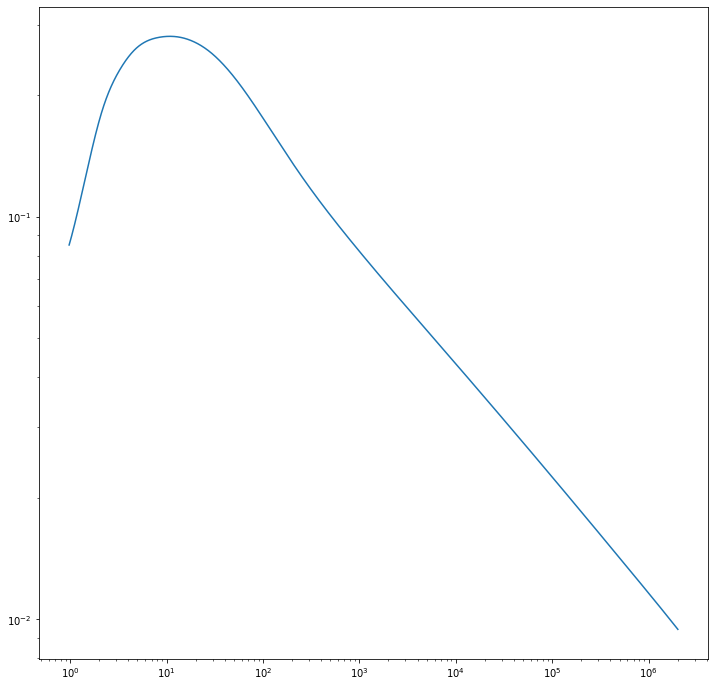

In [5]:
##NOT PART OF ANALYSIS CHECK TO SEE IF things worked
plt.figure(figsize=(12,12))
plt.plot(rigC13_spline,B_C_ratio_spline)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
# TRY THE FORCE_FIELD
#try the force-field approx
#companion function, EK is a column array
def force_field_factor(Z,A,phi,EK):
    proton_mass= 0.938 #In GeV
    PHI=Z*phi/A #really this is (Z e phi)/A but e=1 in the units I want
    print(PHI)
    EK_shifted=EK.copy()
    EK_shifted=EK_shifted-PHI
    EK_sum=EK_shifted.copy()+2*A*proton_mass
    EK_num=EK_shifted*EK_sum
    EK_orig=EK.copy()
    EK_sum_2=EK_orig+2*A*proton_mass
    EK_denom=EK_orig*EK_sum_2
    return np.true_divide(EK_num,EK_denom), EK_shifted
# this function returns the spectra at Earth of the isotope provided (charge, Z, and mass, A) and its shifted energy values
#(not per nucleon)
#given the solar modulation potential phi and the Kinetic energy of the particle
#phi needs to be in units of GV not MV
#EK in GeV (not per nucleon!)
def force_field_approx(LIS,Z,A,phi,EK):
    factor,EK_shifted=force_field_factor(Z,A,phi,EK)
    return LIS*(factor),EK_shifted

0.3
0.2727272727272727
0.3
0.2769230769230769
0.3
0.2727272727272727
0.3
0.2769230769230769


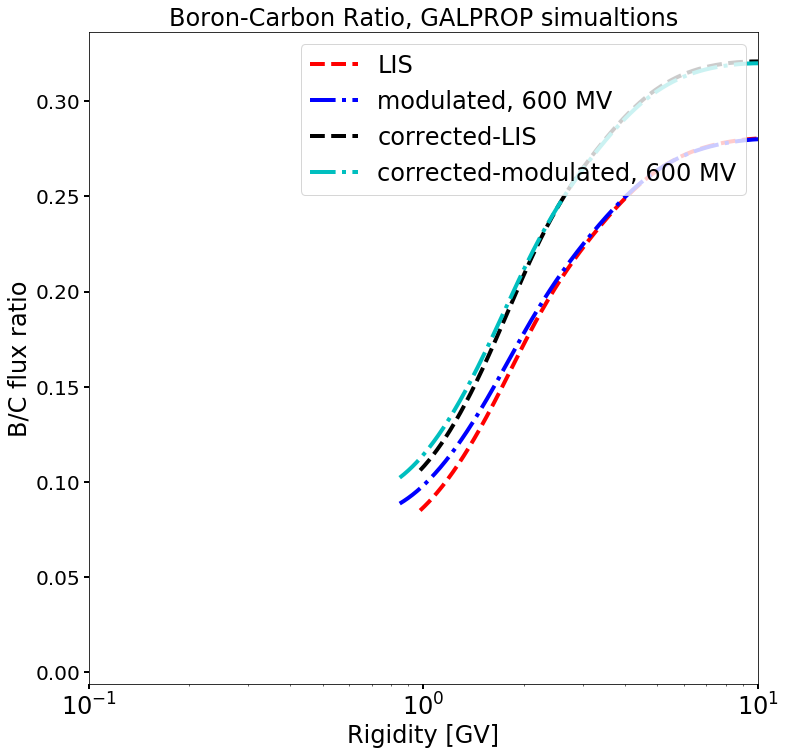

In [7]:
# TO USE THE FORCE_FIELD, APPLY LIKE THIS

#get energy axis and change to GeV (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
b11_mass=11
b10_mass=10
c12_mass=12
c13_mass=13
b_charge=5
c_charge=6
solar_phi=0.6
energy_b11=energy.copy()*b11_mass
energy_b10=energy.copy()*b10_mass
energy_c12=energy.copy()*c12_mass
energy_c13=energy.copy()*c13_mass
# BORON isotopes
B10_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)]
B11_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)]
# CARBON isotopes
C12_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)]
C13_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)]
# do the modulation
B10_flux_modulated,energy_b10_shifted=force_field_approx(B10_flux.copy(),b_charge,b10_mass,solar_phi,energy_b10.copy())
B11_flux_modulated,energy_b11_shifted=force_field_approx(B11_flux.copy(),b_charge,b11_mass,solar_phi,energy_b11.copy())
C12_flux_modulated,energy_c12_shifted=force_field_approx(C12_flux.copy(),c_charge,c12_mass,solar_phi,energy_c12.copy())
C13_flux_modulated,energy_c13_shifted=force_field_approx(C13_flux.copy(),c_charge,c13_mass,solar_phi,energy_c13.copy())
#####
energy_mev_nuc=np.arange(2,9,0.304347391792257)
energy_mev_nuc=undo_log_energy(energy_mev_nuc)
# BORON isotopes
c_B10_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))
c_B11_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))
# CARBON isotopes
c_C12_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))
c_C13_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))
# do the modulation
c_B10_flux_modulated,energy_b10_shifted=force_field_approx(c_B10_flux.copy(),b_charge,b10_mass,solar_phi,energy_b10.copy())
c_B11_flux_modulated,energy_b11_shifted=force_field_approx(c_B11_flux.copy(),b_charge,b11_mass,solar_phi,energy_b11.copy())
c_C12_flux_modulated,energy_c12_shifted=force_field_approx(c_C12_flux.copy(),c_charge,c12_mass,solar_phi,energy_c12.copy())
c_C13_flux_modulated,energy_c13_shifted=force_field_approx(c_C13_flux.copy(),c_charge,c13_mass,solar_phi,energy_c13.copy())
#since the energies have been shifted, need to interpolate each flux and energy separately. 
energy_b10_shifted=energy_b10_shifted/b10_mass
energy_b11_shifted=energy_b11_shifted/b11_mass
energy_c12_shifted=energy_c12_shifted/c12_mass
energy_c13_shifted=energy_c13_shifted/c13_mass
# now send them to construct a ratio
# need to log the modulated flux now and prep the lists
logB10_flux_modulated=log_energy(B10_flux_modulated)
logB11_flux_modulated=log_energy(B11_flux_modulated)
logC12_flux_modulated=log_energy(C12_flux_modulated)
logC13_flux_modulated=log_energy(C13_flux_modulated)
#FOR CORRECT FLUX UNTIS
c_logB10_flux_modulated=log_energy(c_B10_flux_modulated)
c_logB11_flux_modulated=log_energy(c_B11_flux_modulated)
c_logC12_flux_modulated=log_energy(c_C12_flux_modulated)
c_logC13_flux_modulated=log_energy(c_C13_flux_modulated)


energies=[energy_b10_shifted,energy_b11_shifted,energy_c12_shifted,energy_c13_shifted]
fluxes=[logB10_flux_modulated,logB11_flux_modulated,logC12_flux_modulated,logC13_flux_modulated]
c_fluxes=[c_logB10_flux_modulated,c_logB11_flux_modulated,c_logC12_flux_modulated,c_logC13_flux_modulated]

masses=[b10_mass,b11_mass,c12_mass,c13_mass]
charges=[b_charge,b_charge,c_charge,c_charge]

#do the ratio (interpolation and all)
num_steps=2000
rigC13_spline_modulated,B_C_ratio_spline_modulated=B_C_ratio_modulated(energies,fluxes,masses,charges,num_steps)
c_rigC13_spline_modulated,c_B_C_ratio_spline_modulated=B_C_ratio_modulated(energies,c_fluxes,masses,charges,num_steps)

# compare the ratio to modulated ratio
model=0
num_spline_steps=2000
c_logB10_flux=log_energy(c_B10_flux)
c_logB11_flux=log_energy(c_B11_flux)
c_logC12_flux=log_energy(c_C12_flux)
c_logC13_flux=log_energy(c_C13_flux)

c_rigC13_spline,c_B_C_ratio_spline=B_C_ratio(energy,c_logB10_flux,c_logB11_flux,c_logC12_flux,c_logC13_flux,num_spline_steps)
##NOT PART OF ANALYSIS CHECK TO SEE IF things worked
fnt=24
plt.figure(figsize=(12,12))
plt.plot(rigC13_spline,B_C_ratio_spline,'r--',linewidth=4, label="LIS")
plt.plot(rigC13_spline_modulated,B_C_ratio_spline_modulated,'b-.',linewidth=4,label="modulated, 600 MV")
plt.plot(c_rigC13_spline,c_B_C_ratio_spline,'k--',linewidth=4, label="corrected-LIS")
plt.plot(c_rigC13_spline_modulated,c_B_C_ratio_spline_modulated,'c-.',linewidth=4,label="corrected-modulated, 600 MV")


#plt.plot(rigC13_spline_modulated_12,B_C_ratio_spline_modulated_12,'g-',linewidth=4,label="modulated, 1200 MV")

plt.xlim([0.1,10])
plt.xscale('log')
ax = plt.gca()
ax.tick_params(width=2,length=5)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.yscale('log')
plt.ylabel("B/C flux ratio",fontsize=fnt)
plt.xlabel("Rigidity [GV]",fontsize=fnt)
plt.legend(loc='upper right',fontsize=fnt)
plt.title("Boron-Carbon Ratio, GALPROP simualtions", fontsize=fnt)
plt.savefig("galprop_sims_solar_modulation_B_C.png")
plt.show()
#Be_10_flux_modulated,energy_be_shifted=force_field_approx(Be_10_flux.copy(),be10_charge,be10_mass,solar_phi,energy_be.copy())

In [8]:
def B_C_ratio_modulated_2(energy,flux,mass,charge,num_steps):
    i=0
    rigidities=[]
    while i <len(energy):
        rigidities.append(np.array(log_energy(gimme_rigidity(energy[i],mass[i],charge[i]))))
        i+=1
    numerator_x_list=[rigidities[0],rigidities[1]]
    numerator_y_list=[flux[0],flux[1]]
    denominator_x_list=[rigidities[2],rigidities[3]]
    denominator_y_list=[flux[2],flux[3]] 
    spline_min_R,spline_max_R=find_interpolation_range(rigidities[0],rigidities[1],rigidities[2],rigidities[3])
    ratio,rig_values=calc_ratio_spline(numerator_x_list,numerator_y_list,
        denominator_x_list,denominator_y_list,spline_min_R,spline_max_R,num_steps)
    return rig_values, ratio


In [9]:
# test other fluxes, no ratios
model=0
Be_10_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)].copy()
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
print(energy)
print(Be_10_flux)
be10_mass=10
be10_charge=4
solar_phi=0.600
energy_be=energy.copy()*be10_mass
energy_be
Be_10_flux_modulated,energy_be_shifted=force_field_approx(Be_10_flux.copy(),be10_charge,be10_mass,solar_phi,energy_be.copy())
Be_10_flux_modulated_12,energy_be_shifted_12=force_field_approx(Be_10_flux.copy(),be10_charge,be10_mass,2*solar_phi,energy_be.copy())

[1.00000000e-01 2.01533567e-01 4.06157787e-01 8.18544275e-01
 1.64964148e+00 3.32458131e+00 6.70014730e+00 1.35030459e+01
 2.72131700e+01 5.48436722e+01 1.10528409e+02 2.22751845e+02
 4.48919739e+02 9.04723963e+02 1.82332247e+03 3.67460682e+03
 7.40556620e+03 1.49247017e+04 3.00782838e+04 6.06178382e+04
 1.22165292e+05 2.46204070e+05 4.96183844e+05 9.99977000e+05]
[8.9241021e-06 6.3123873e-05 3.1475243e-04 1.0689475e-03 2.4202368e-03
 3.6166632e-03 3.7367393e-03 2.8497735e-03 1.7210221e-03 9.0644078e-04
 4.4667252e-04 2.1798976e-04 1.0717953e-04 5.3216503e-05 2.6663043e-05
 1.3396648e-05 6.7322408e-06 3.3807498e-06 1.6958179e-06 8.4955639e-07
 4.2505428e-07 2.1240379e-07 1.0602197e-07 5.2395109e-08]
0.24
0.48


In [10]:
def make_plot_comp_solarmod(energy1,energy2,energy3,flux1,flux2,flux3):
    fnt=22

    x1=0.5*energy2.min()
    x2=10**2

    y1=10**-10
    y2=10*flux2.max()

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r',marker="X",ms=10,label="not modulated")
    plt.plot(energy2,flux2,'b',marker="o",ms=10,label="modulated 600MV")
    plt.plot(energy3,flux3,'k',marker="X",ms=10,label="modulated 1200MV")
    #plt.plot(energy4,flux4,'c',marker="o",ms=10,label="modulated 1200MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Kinetic Energy [GeV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("C12 flux "r'$m^{-2} s^{-1} sr^{-1} (MeV/nuc)^{-1}}$',fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("Solar Modulation test", fontsize=fnt)
    plt.savefig("solar_modulation_test.png")
    #don't show on supercomputer
    plt.show()


0.3
0.6
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3]


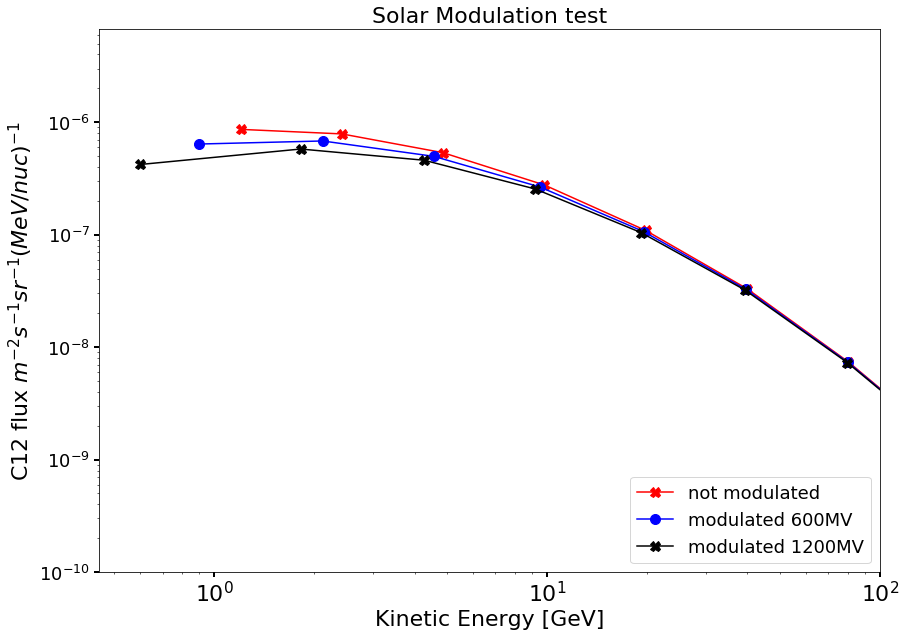

In [13]:
#get energy axis and change to GeV (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3) # in GeV per nucleon

energy_mev_nuc=np.arange(2,9,0.304347391792257)
energy_mev_nuc=undo_log_energy(energy_mev_nuc)

c12_mass=12
energy_c12=energy.copy()*c12_mass #GeV now 

c_charge=6
solar_phi=0.6

c_C12_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))

c_C12_flux_modulated,energy_c12_shifted=force_field_approx(c_C12_flux.copy(),c_charge,c12_mass,solar_phi,energy_c12.copy())

solar_phi=1.2
# do the modulation
c_C12_flux_modulated_1,energy_c12_shifted_1=force_field_approx(c_C12_flux.copy(),c_charge,c12_mass,solar_phi,energy_c12.copy())
#energy_c12_shifted=energy_c12_shifted/c12_mass
#energy_c12_shifted_1=energy_c12_shifted_1/c12_mass
print(energy_c12-energy_c12_shifted)
make_plot_comp_solarmod(energy_c12,energy_c12_shifted,energy_c12_shifted_1,c_C12_flux,c_C12_flux_modulated,c_C12_flux_modulated_1)

In [12]:
make_plot_comp_solarmod(energy_c12,energy_c12_shifted,energy_c12,energy_c12_shifted,C12_flux,C12_flux_modulated,c_C12_flux,c_C12_flux_modulated)

TypeError: make_plot_comp_solarmod() takes 6 positional arguments but 8 were given

In [ ]:
from Isotope_CR import isotope

In [ ]:
#try getting a boron isotope
b_10=isotope('B-10',10,5)

In [ ]:
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy=np.true_divide(energy,10**3)
b_10.energy=energy

In [ ]:
b_10.flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)]

In [ ]:
b_10.flux_modulated,b_10.energy_modulated=force_field_approx(b_10.flux.copy(),b_10.charge,b_10.mass,solar_phi,b_10.energy.copy()*b_10.mass)

In [ ]:
# TO USE THE FORCE_FIELD, APPLY LIKE THIS
b11_mass=11
b10_mass=10
c12_mass=12
c13_mass=13
b_charge=5
c_charge=6
solar_phi=0.600
energy_b11=energy.copy()*b11_mass
energy_b10=energy.copy()*b10_mass
energy_c12=energy.copy()*c12_mass
energy_c13=energy.copy()*c13_mass
# BORON isotopes
B10_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron10_loc)]
B11_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron11_loc)]
# CARBON isotopes
C12_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)]
C13_flux=fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)]
# do the modulation
B10_flux_modulated,energy_b10_shifted=force_field_approx(B10_flux.copy(),b_charge,b10_mass,solar_phi,energy_b10.copy())
B11_flux_modulated,energy_b11_shifted=force_field_approx(B11_flux.copy(),b_charge,b11_mass,solar_phi,energy_b11.copy())
C12_flux_modulated,energy_c12_shifted=force_field_approx(C12_flux.copy(),c_charge,c12_mass,solar_phi,energy_c12.copy())
C13_flux_modulated,energy_c13_shifted=force_field_approx(C13_flux.copy(),c_charge,c13_mass,solar_phi,energy_c13.copy())
#since the energies have been shifted, need to interpolate each flux and energy separately. 
energy_b10_shifted=energy_b10_shifted/b10_mass
energy_b11_shifted=energy_b11_shifted/b11_mass
energy_c12_shifted=energy_c12_shifted/c12_mass
energy_c13_shifted=energy_c13_shifted/c13_mass
# now send them to construct a ratio
# need to log the modulated flux now and prep the lists
logB10_flux_modulated=log_energy(B10_flux_modulated)
logB11_flux_modulated=log_energy(B11_flux_modulated)
logC12_flux_modulated=log_energy(C12_flux_modulated)
logC13_flux_modulated=log_energy(C13_flux_modulated)
energies=[energy_b10_shifted,energy_b11_shifted,energy_c12_shifted,energy_c13_shifted]
fluxes=[logB10_flux_modulated,logB11_flux_modulated,logC12_flux_modulated,logC13_flux_modulated]
masses=[b10_mass,b11_mass,c12_mass,c13_mass]
charges=[b_charge,b_charge,c_charge,c_charge]

#do the ratio (interpolation and all)
num_steps=2000
rigC13_spline_modulated,B_C_ratio_spline_modulated=B_C_ratio_modulated(energies,fluxes,masses,charges,num_steps)

# compare the ratio to modulated ratio
##NOT PART OF ANALYSIS CHECK TO SEE IF things worked
plt.figure(figsize=(12,12))
plt.plot(rigC13_spline,B_C_ratio_spline,'r--', label="LIS")
plt.plot(rigC13_spline_modulated,B_C_ratio_spline_modulated,'b-.',label="modulated")
plt.xlim([0.5,10**2])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
#Be_10_flux_modulated,energy_be_shifted=force_field_approx(Be_10_flux.copy(),be10_charge,be10_mass,solar_phi,energy_be.copy())